In [19]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# Exercise 3 [Linear Quadratic Regulators]

Here we discuss the problem of computing the optimal control policy for problems of the form
$$ \min_{\mathbf{u}_n} \mathbf{x}_N^T \mathbf{Q}_N \mathbf{x}_N \sum_{n=0}^{N-1} \mathbf{x}_{n}^T \mathbf{Q}_n \mathbf{x}_n + \mathbf{u}_n^T \mathbf{R}_n \mathbf{u}_n\\
s.t. \ \mathbf{x}_{n+1} = \mathbf{A}_n \mathbf{x}_n + \mathbf{B}_n \mathbf{u}_n + \omega_n$$
where $\mathbf{R}>0$, $\mathbf{Q} \geq 0$ and $\mathbb{E}(\omega_n) = 0$ and $\mathbb{E}(\omega_n^T \omega_n) \leq \infty$ (i.e. the noise has 0 mean and finite variance)

We have seen in the class that the optimal control and optimal value function (and cost-to-go for every stage) could be found by solving the following backward Riccati equations from $N$ to $0$
$$\mathbf{P}_N = \mathbf{Q}_N\\
\mathbf{K}_n = -(\mathbf{R}_n+\mathbf{B}_n^T \mathbf{P}_{n+1} \mathbf{B}_n)^{-1} (\mathbf{B}_n^T \mathbf{P}_{n+1} A_n)\\
\mathbf{P}_n = \mathbf{Q}_n + \mathbf{A}_n^T \mathbf{P}_{n+1} \mathbf{A}_n + \mathbf{A}_n^T \mathbf{P}_{n+1} \mathbf{B}_n \mathbf{K}_n$$

The optimal policy is then $$\mu_n^* = \mathbf{K}_n \mathbf{x}_n$$
and the optimal value function is $$J_0(\mathbf{x}_0) = \mathbf{x}_0^T \mathbf{P}_0 \mathbf{x}_0 + \sum_{n=0}^{N-1} \mathbb{E}(\omega_n^T P_{n+1} \omega_n)$$

## Question 1
Write a function that solves the backward Riccati equations assuming that $A_n$, $B_n$, $Q_n$ and $R_n$ are constant matrices by completing the matrix below

In [14]:
def solve_ricatti_equations(A, B, Q, R, horizon_length):
    """
    This function solves the backward Riccatti equations for regulator problems of the form
    min xQx + sum(xQx + uRu) subject to xn+1 = Axn + Bun
    
    Arguments:
    A, B, Q, R: numpy arrays defining the problem
    horizon_length: length of the horizon
    
    Returns:
    P: list of numpy arrays containing Pn from N to 0
    K: list of numpy arrays containing Kn from N-1 to 0
    """
    P = [] #will contain the list of Ps from N to 0
    K = [] #will contain the list of Ks from N-1 to 0

    # Initialization
    P_cur = np.copy(Q)
    P.append(Q)
    
    # Start iteration
    for i in range(horizon_length):
        K_cur = -linalg.pinv(R + B.transpose() @ P_cur @ B) @ (B.transpose() @ P_cur @ A)
        P_cur = Q + A.transpose() @ P_cur @ A + A.transpose() @ P_cur @ B @ K_cur
        K.append(K_cur)
        P.append(P_cur)

    return P[-1], K[-1]

## Question 2

1. Compute the optimal controllers for the four systems shown in Exercise 2 [Controllability] for an horizon length of 100 steps using $Q = I_{3 \times 3}$ and $R = 0.1$.
2. Compute the behavior of each system for initial conditions $x_0 = [1,1,1]$ when using the optimal controller and compare the system behavior when no controller is used ($u_n = 0$). 
3. For which system did the controller lead to a stable system?

In [15]:
# common settings
Q = np.eye(3)
R = 0.1
N = 100

### 2.1 Compute the optimal controllers for each system

In [16]:
# (a)
A1 = np.array([[1, 0, 1], [0, 1.5, 0], [1, 0, 0]])
B1 = np.array([[0], [0], [1]])

# (b)
A2 = np.array([[1, 0, 1], [0, 1.5, 0], [1, 0, 0]])
B2 = np.array([[0], [1], [1]])

# (c)
A3 = np.array([[0.5, 0, 0.5], [0, -0.5, -1], [0, 0, 0.5]])
B3 = np.array([[1], [0], [1]])

# (d)
A4 = np.array([[0.5, 0.5, 0], [0, -0.5, -1], [-0.1, 0, 0.5]])
B4 = np.array([[0], [1], [0]])

In [17]:
P1, K1 = solve_ricatti_equations(A1, B1, Q, R, N)
P2, K2 = solve_ricatti_equations(A2, B2, Q, R, N)
P3, K3 = solve_ricatti_equations(A3, B3, Q, R, N)
P4, K4 = solve_ricatti_equations(A4, B4, Q, R, N)
print('Controller for system (a):')
print(P1)
print(K1)
print()

print('Controller for system (c):')
print(P2)
print(K2)
print()

print('Controller for system (c):')
print(P3)
print(K3)
print()

print('Controller for system (d):')
print(P4)
print(K4)

Controller for system (a):
[[3.05679808e+00 0.00000000e+00 1.89553501e+00]
 [0.00000000e+00 2.97525584e+35 0.00000000e+00]
 [1.89553501e+00 0.00000000e+00 2.83085996e+00]]
[[-1.61263077  0.         -0.64675045]]

Controller for system (c):
[[1556.98705925 -870.87093783  973.89515139]
 [-870.87093783  489.33360608 -544.57583   ]
 [ 973.89515139 -544.57583     610.92533676]]
[[-15.11282645   7.39370436  -9.19261298]]

Controller for system (c):
[[1.18431465 0.0442141  0.09714979]
 [0.0442141  1.29689333 0.5894738 ]
 [0.09714979 0.5894738  2.19464132]]
[[-0.1744317   0.08625699 -0.31387412]]

Controller for system (d):
[[ 1.34430434  0.31849977 -0.11239488]
 [ 0.31849977  1.33046684  0.00677749]
 [-0.11239488  0.00677749  1.45670327]]
[[-0.11085341  0.35371917  0.92772377]]


### 2.2 Compare the optimal controller with no controller

In [25]:
def test_controller(A, B, x_init, K):
    steps = 100
    x_traj = []
    u_traj = []
    x_traj.append(np.copy(x_init))
    for i in range(steps):
        u_traj.append(K @ x_traj[i])
        x_traj.append(A @ x_traj[i] + B @ u_traj[i])
    return x_traj, u_traj

<Figure size 432x288 with 0 Axes>

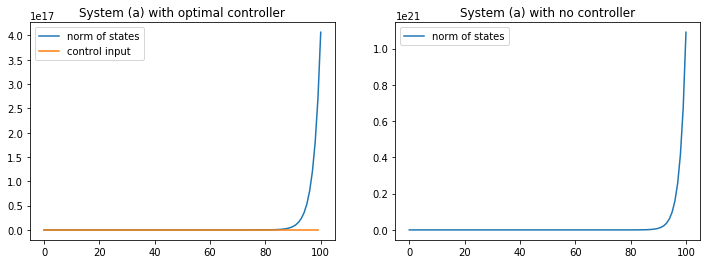

<Figure size 432x288 with 0 Axes>

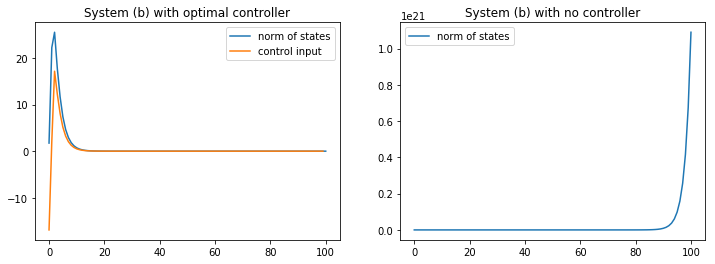

<Figure size 432x288 with 0 Axes>

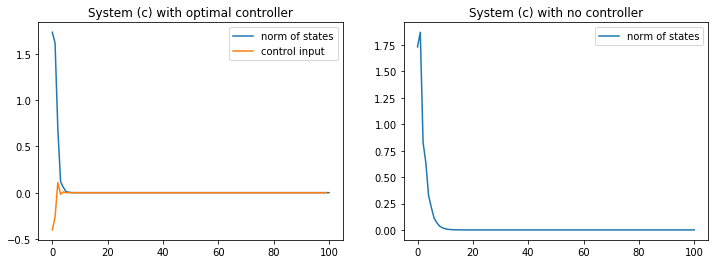

<Figure size 432x288 with 0 Axes>

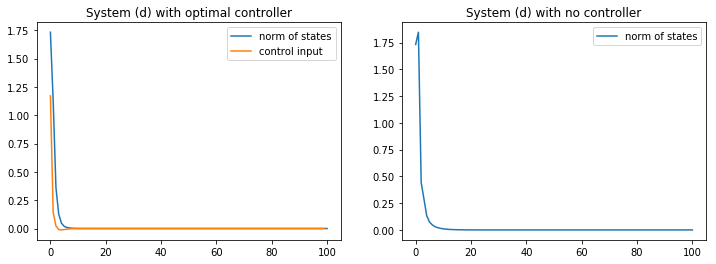

In [55]:
x_init = np.array([[1], [1], [1]])

A_list = [A1, A2, A3, A4]
B_list = [B1, B2, B3, B4]
K_list = [K1, K2, K3, K4]
system_list = ['a', 'b', 'c', 'd']

for i in range(4):
    x_traj, u_traj = test_controller(A_list[i], B_list[i], x_init, K_list[i])
    x_norm_traj = list(map(lambda x: linalg.norm(x), x_traj))
    u_flat_traj = list(map(lambda x: x[0][0], u_traj))

    plt.figure()
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.set_title('System (' + system_list[i] + ') with optimal controller')
    ax1.plot(x_norm_traj, label='norm of states')
    ax1.plot(u_flat_traj, label='control input')
    ax1.legend()
    
    x_ori_traj, u_ori_traj = test_controller(A_list[i], B_list[i], x_init, np.array([[0, 0, 0]]))
    x_ori_norm_traj = list(map(lambda x: linalg.norm(x), x_ori_traj))
    ax2.set_title('System (' + system_list[i] + ') with no controller')
    ax2.plot(x_ori_norm_traj, label='norm of states')
    ax2.legend()

As we can see, the controllers in system (b), (c) and (d) can let the state starting from \( [1, 1, 1] \) finally converge to \( [0, 0, 0] \).

For system (c) and (d), the state will finally converge whether there exists a controller as those two systems are already stable. However, for system (b), the state will not converge without the controller. And for system (a), the system cannot converge even if there is an optimal controller.

### 2.3 For which system did the controller lead to a stable system?
As shown above, the controllers of system (b), (c) and (d) lead to stable systems, in which cases, the norm of state final converges to zero.

However, the controller of system (a) can not lead to a stable system because system (a) is actually uncontrollable (already justified in exercise 2).